In [1]:
import networkx as nx
from aho_corasick import build_state_machine

In [2]:
from ipywidgets import widgets

In [3]:
examples = [
    ["hello", "world"],
    ["ab", "abc", "aby"],
    ["весна", "весло", "народ", "сир", "снасть"]
]
example_idx = widgets.Dropdown(
    options = [("[\"hello\", ...", 0), ("[\"ab\", ...", 1), ("[\"весна\", ...", 2)],
    value = 2,
    description = "Приклад:",
)
display(example_idx)


Dropdown(description='Приклад:', index=2, options=(('["hello", ...', 0), ('["ab", ...', 1), ('["весна", ...', …

In [4]:
words = examples[example_idx.value]
root = build_state_machine(words)

In [5]:
g = nx.MultiGraph()
g.add_node(root, key='', output=[]) # Add root node

queue = [root]

while queue:
    node = queue.pop(0)
    # Traverse each child node
    for key, child_node in node.children.items():
        queue.append(child_node)
        
        g.add_node(child_node, key=child_node.char, output=child_node.output)
        g.add_edge(node, child_node, fail=False)
        if child_node.fail:
            g.add_edge(child_node, child_node.fail, fail=True)

In [6]:
edge_color = ["tab:red" if e[2].get("fail", False) else "black" for e in g.edges(data=True)]
edge_style = ["solid" if e[2].get("fail", False) else ":" for e in g.edges(data=True)]
edge_width = [1 if e[2].get("fail", False) else 2 for e in g.edges(data=True)]

In [7]:
gBFS = g.copy()
fail_edges = [e[:2] for e in gBFS.edges(data=True) if e[2]["fail"]]
gBFS.remove_edges_from(fail_edges)
pos = nx.layout.bfs_layout(gBFS, start=root)

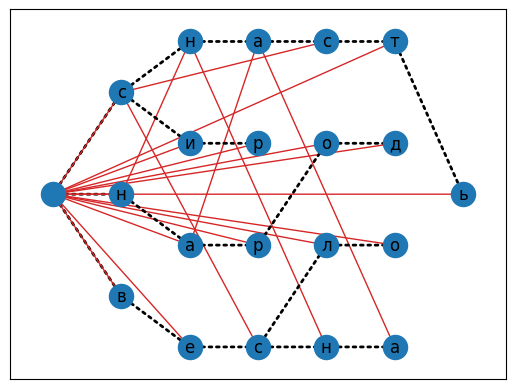

In [8]:
nx.draw_networkx(g, pos=pos, edge_color=edge_color, style=edge_style, width=edge_width)